# Outliers

- To check the outliers we will use the z-score

In [11]:
import data_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_awardsPlayers, csv_coaches, csv_playersTeams, csv_players, csv_seriesPost, csv_teamsPost, csv_teams = data_utils.load_data()

#### Outliers in players

In [12]:
csv_players = data_utils.setup_players(csv_players, csv_playersTeams)

weight_column = csv_players['weight']
height_column = csv_players['height']

mean = np.mean(weight_column)
standard_deviation = np.std(weight_column)

print(f"Outliers in Players: ")

outliers = []
for weight in weight_column:
    z_score = (weight - mean)/standard_deviation
    if np.abs(z_score) > 3:
        outliers.append(weight)

print("Outliers in weight: ", outliers)

mean = np.mean(height_column)
standard_deviation = np.std(height_column)

outliers = []
for height in height_column:
    z_score = (height - mean)/standard_deviation
    if np.abs(z_score) > 3:
        outliers.append(height)

print("Outliers in height: ", outliers)

Outliers in Players: 
Outliers in weight:  [0, 0, 0, 0, 0, 0, 253]
Outliers in height:  [9.0]


#### Outliers Statistics per Position

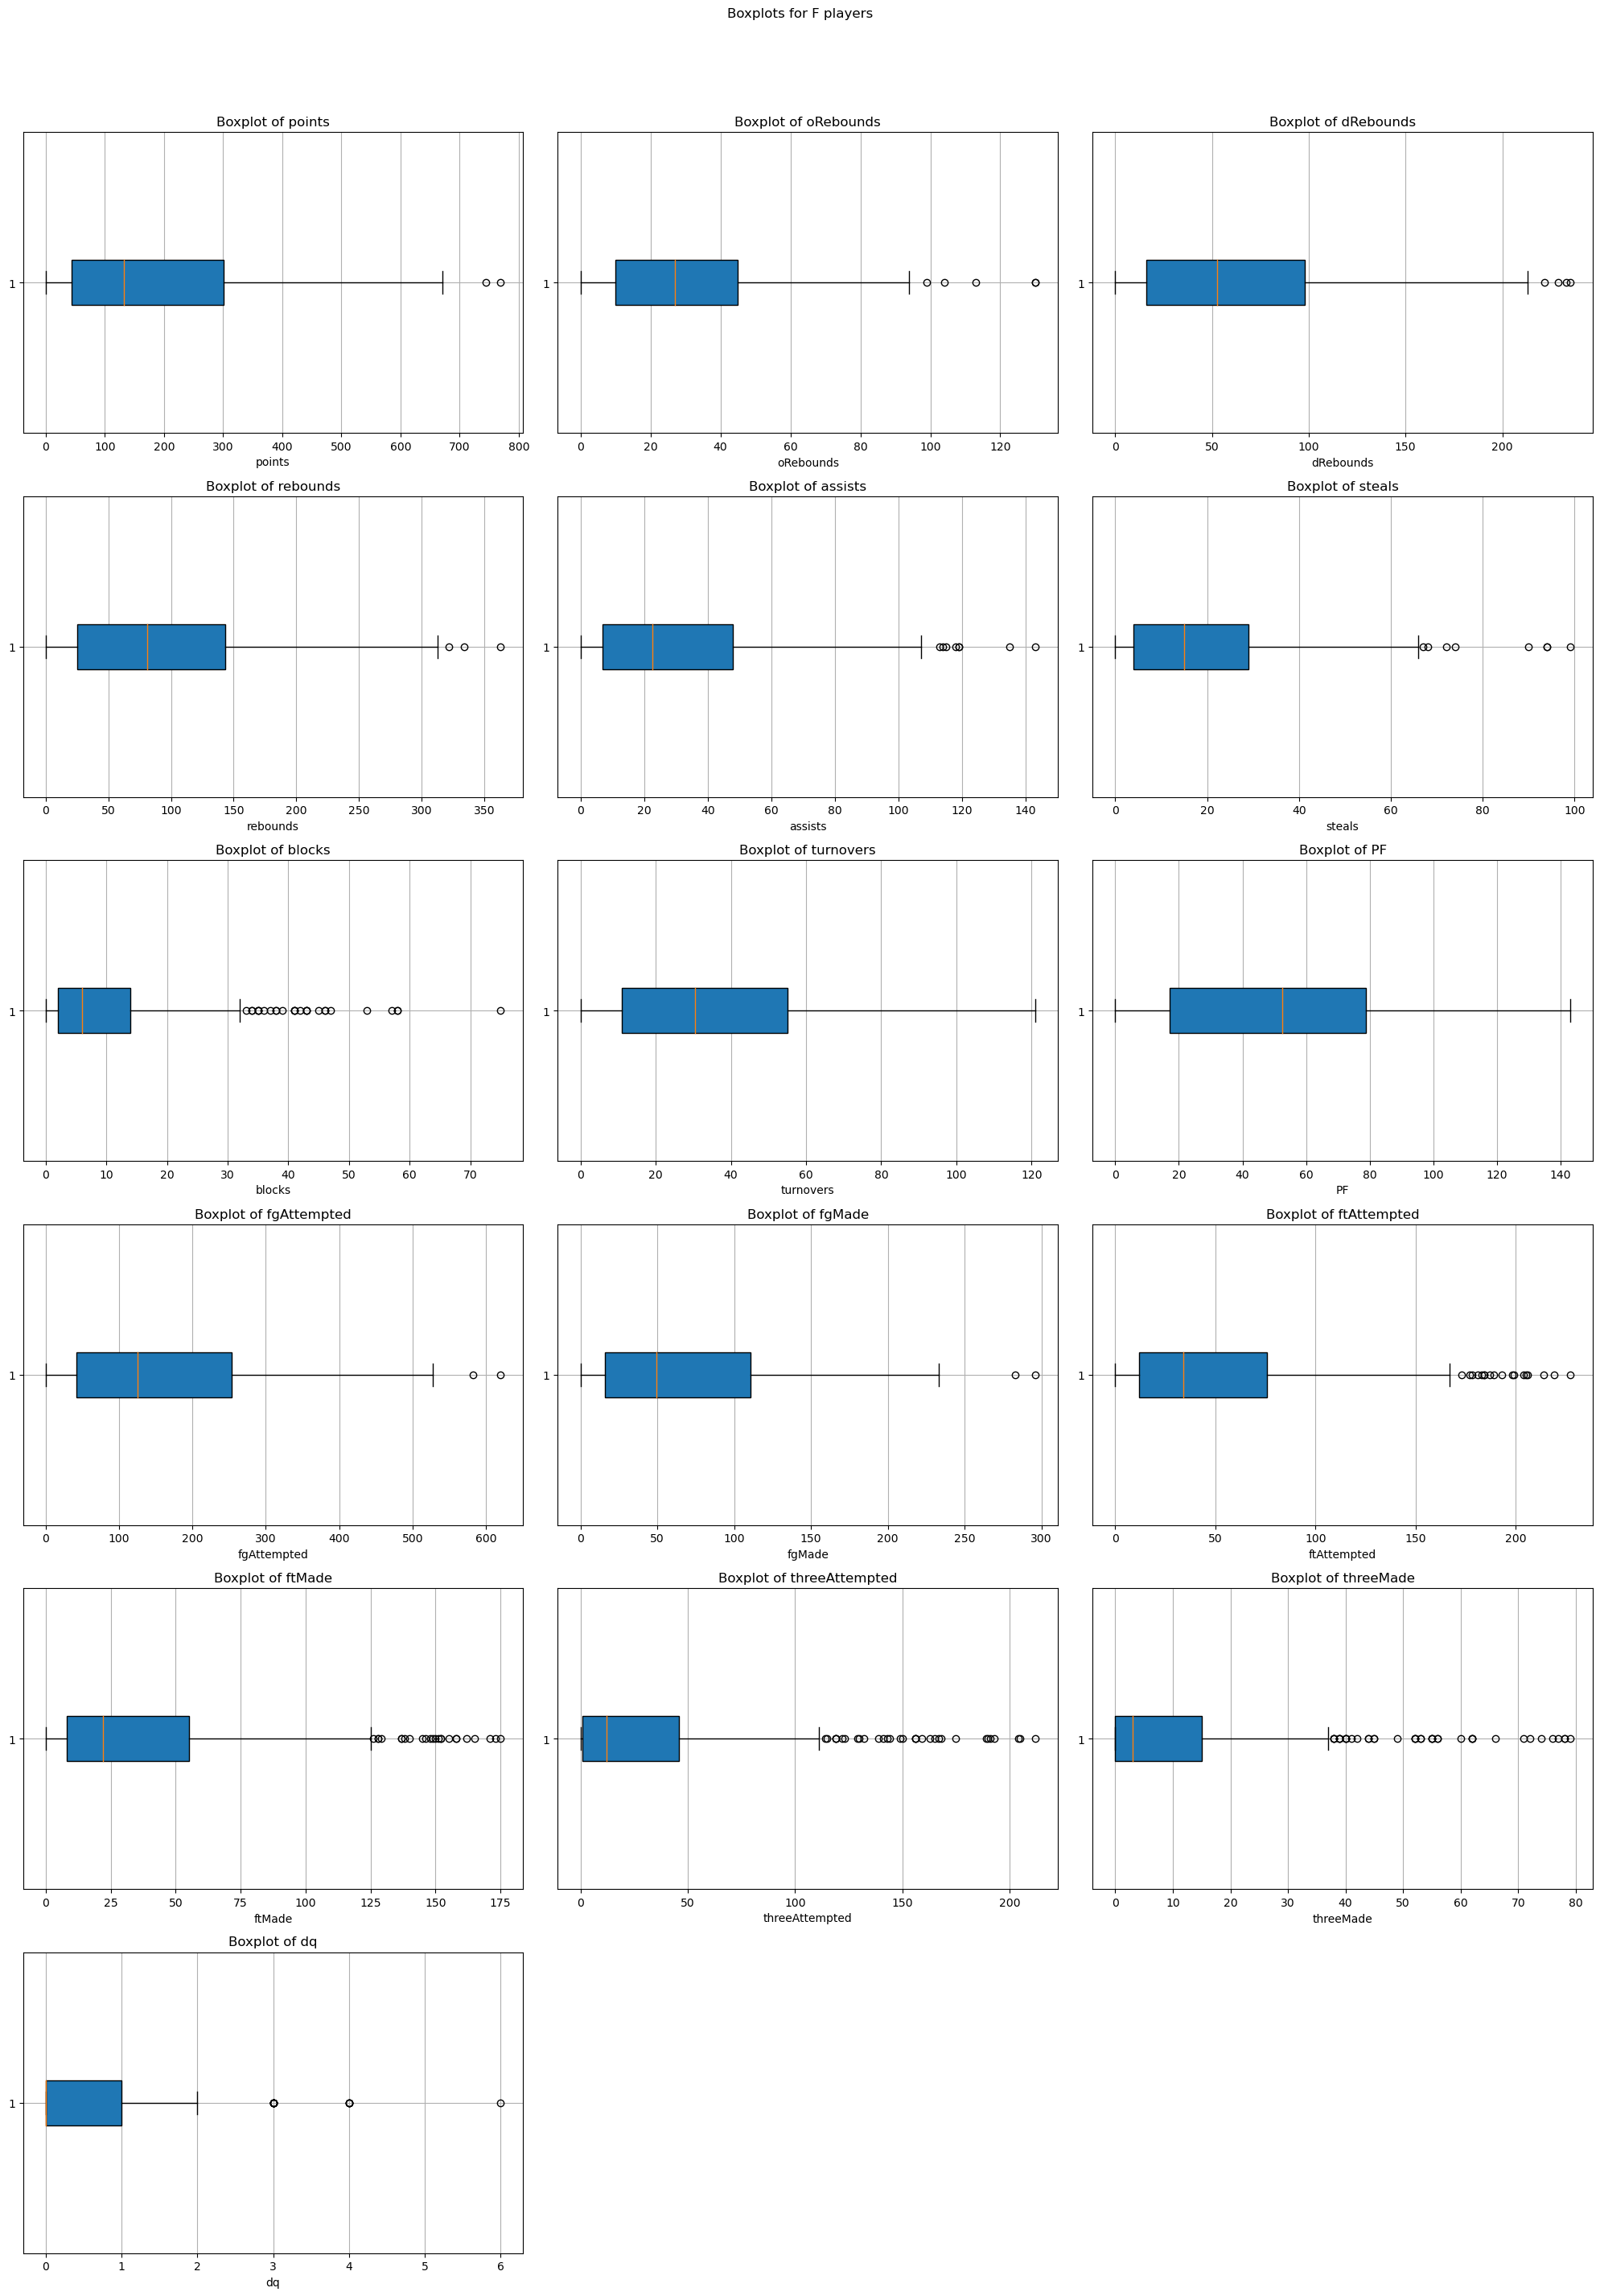

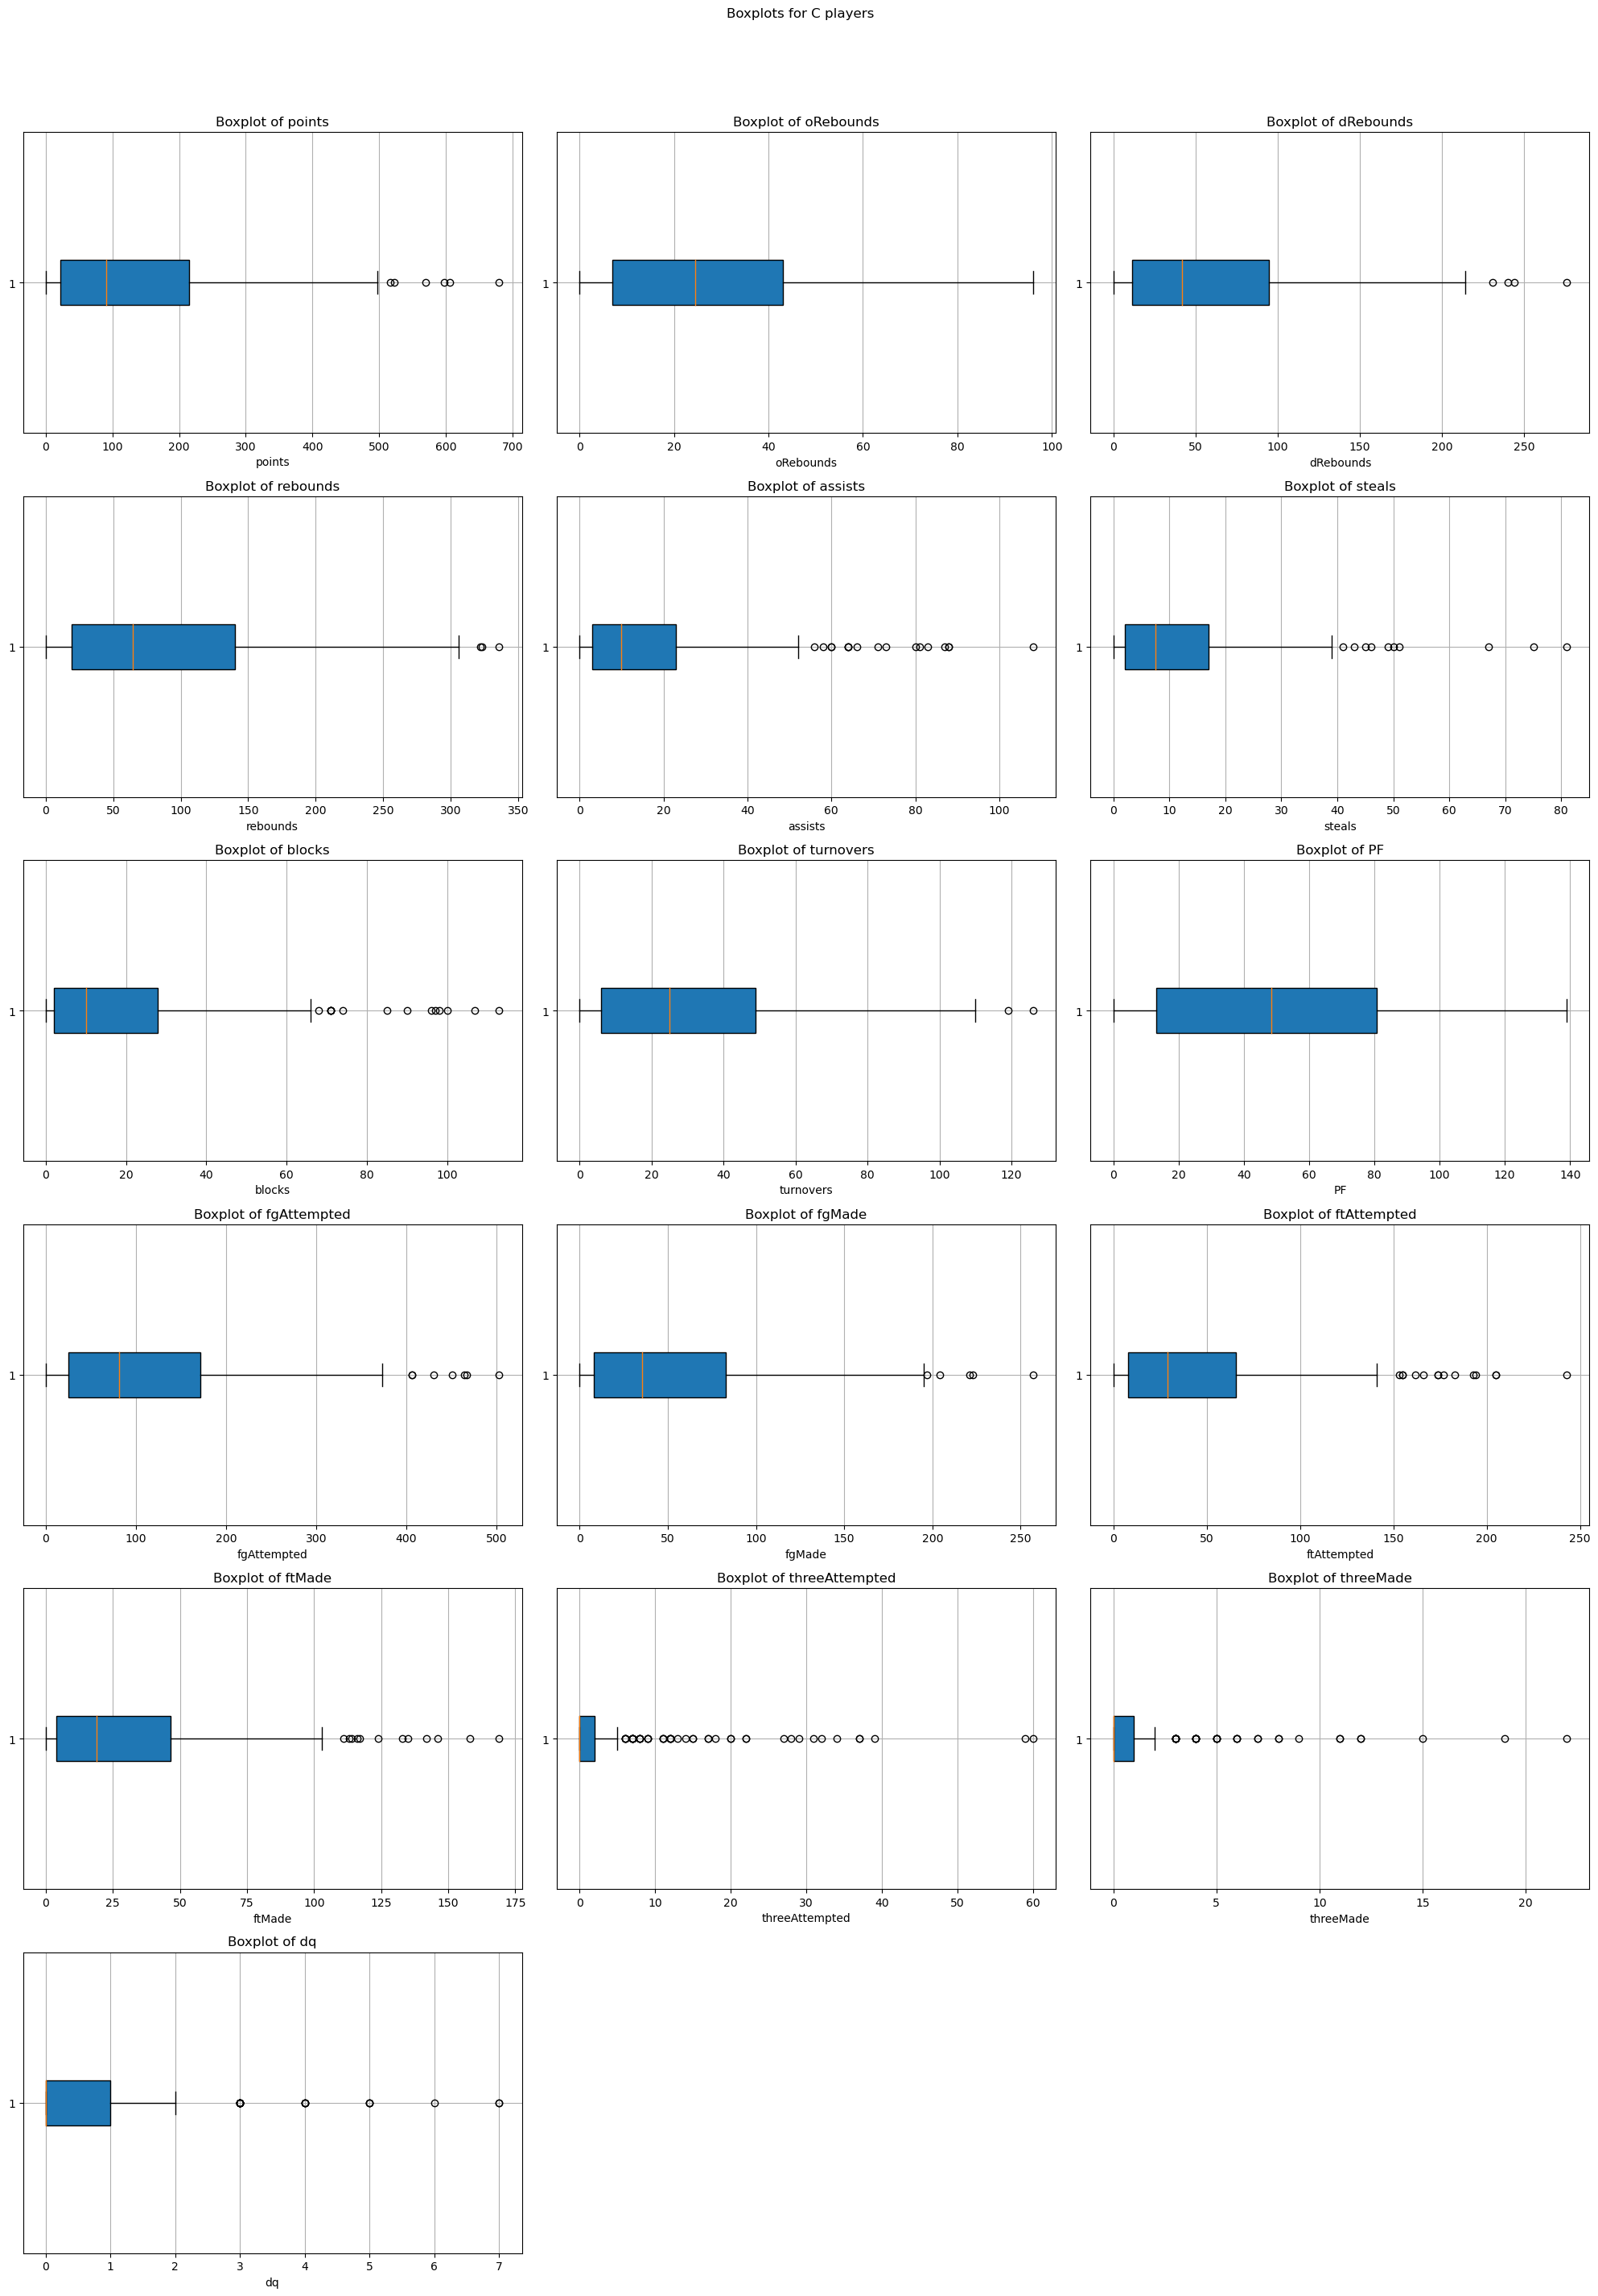

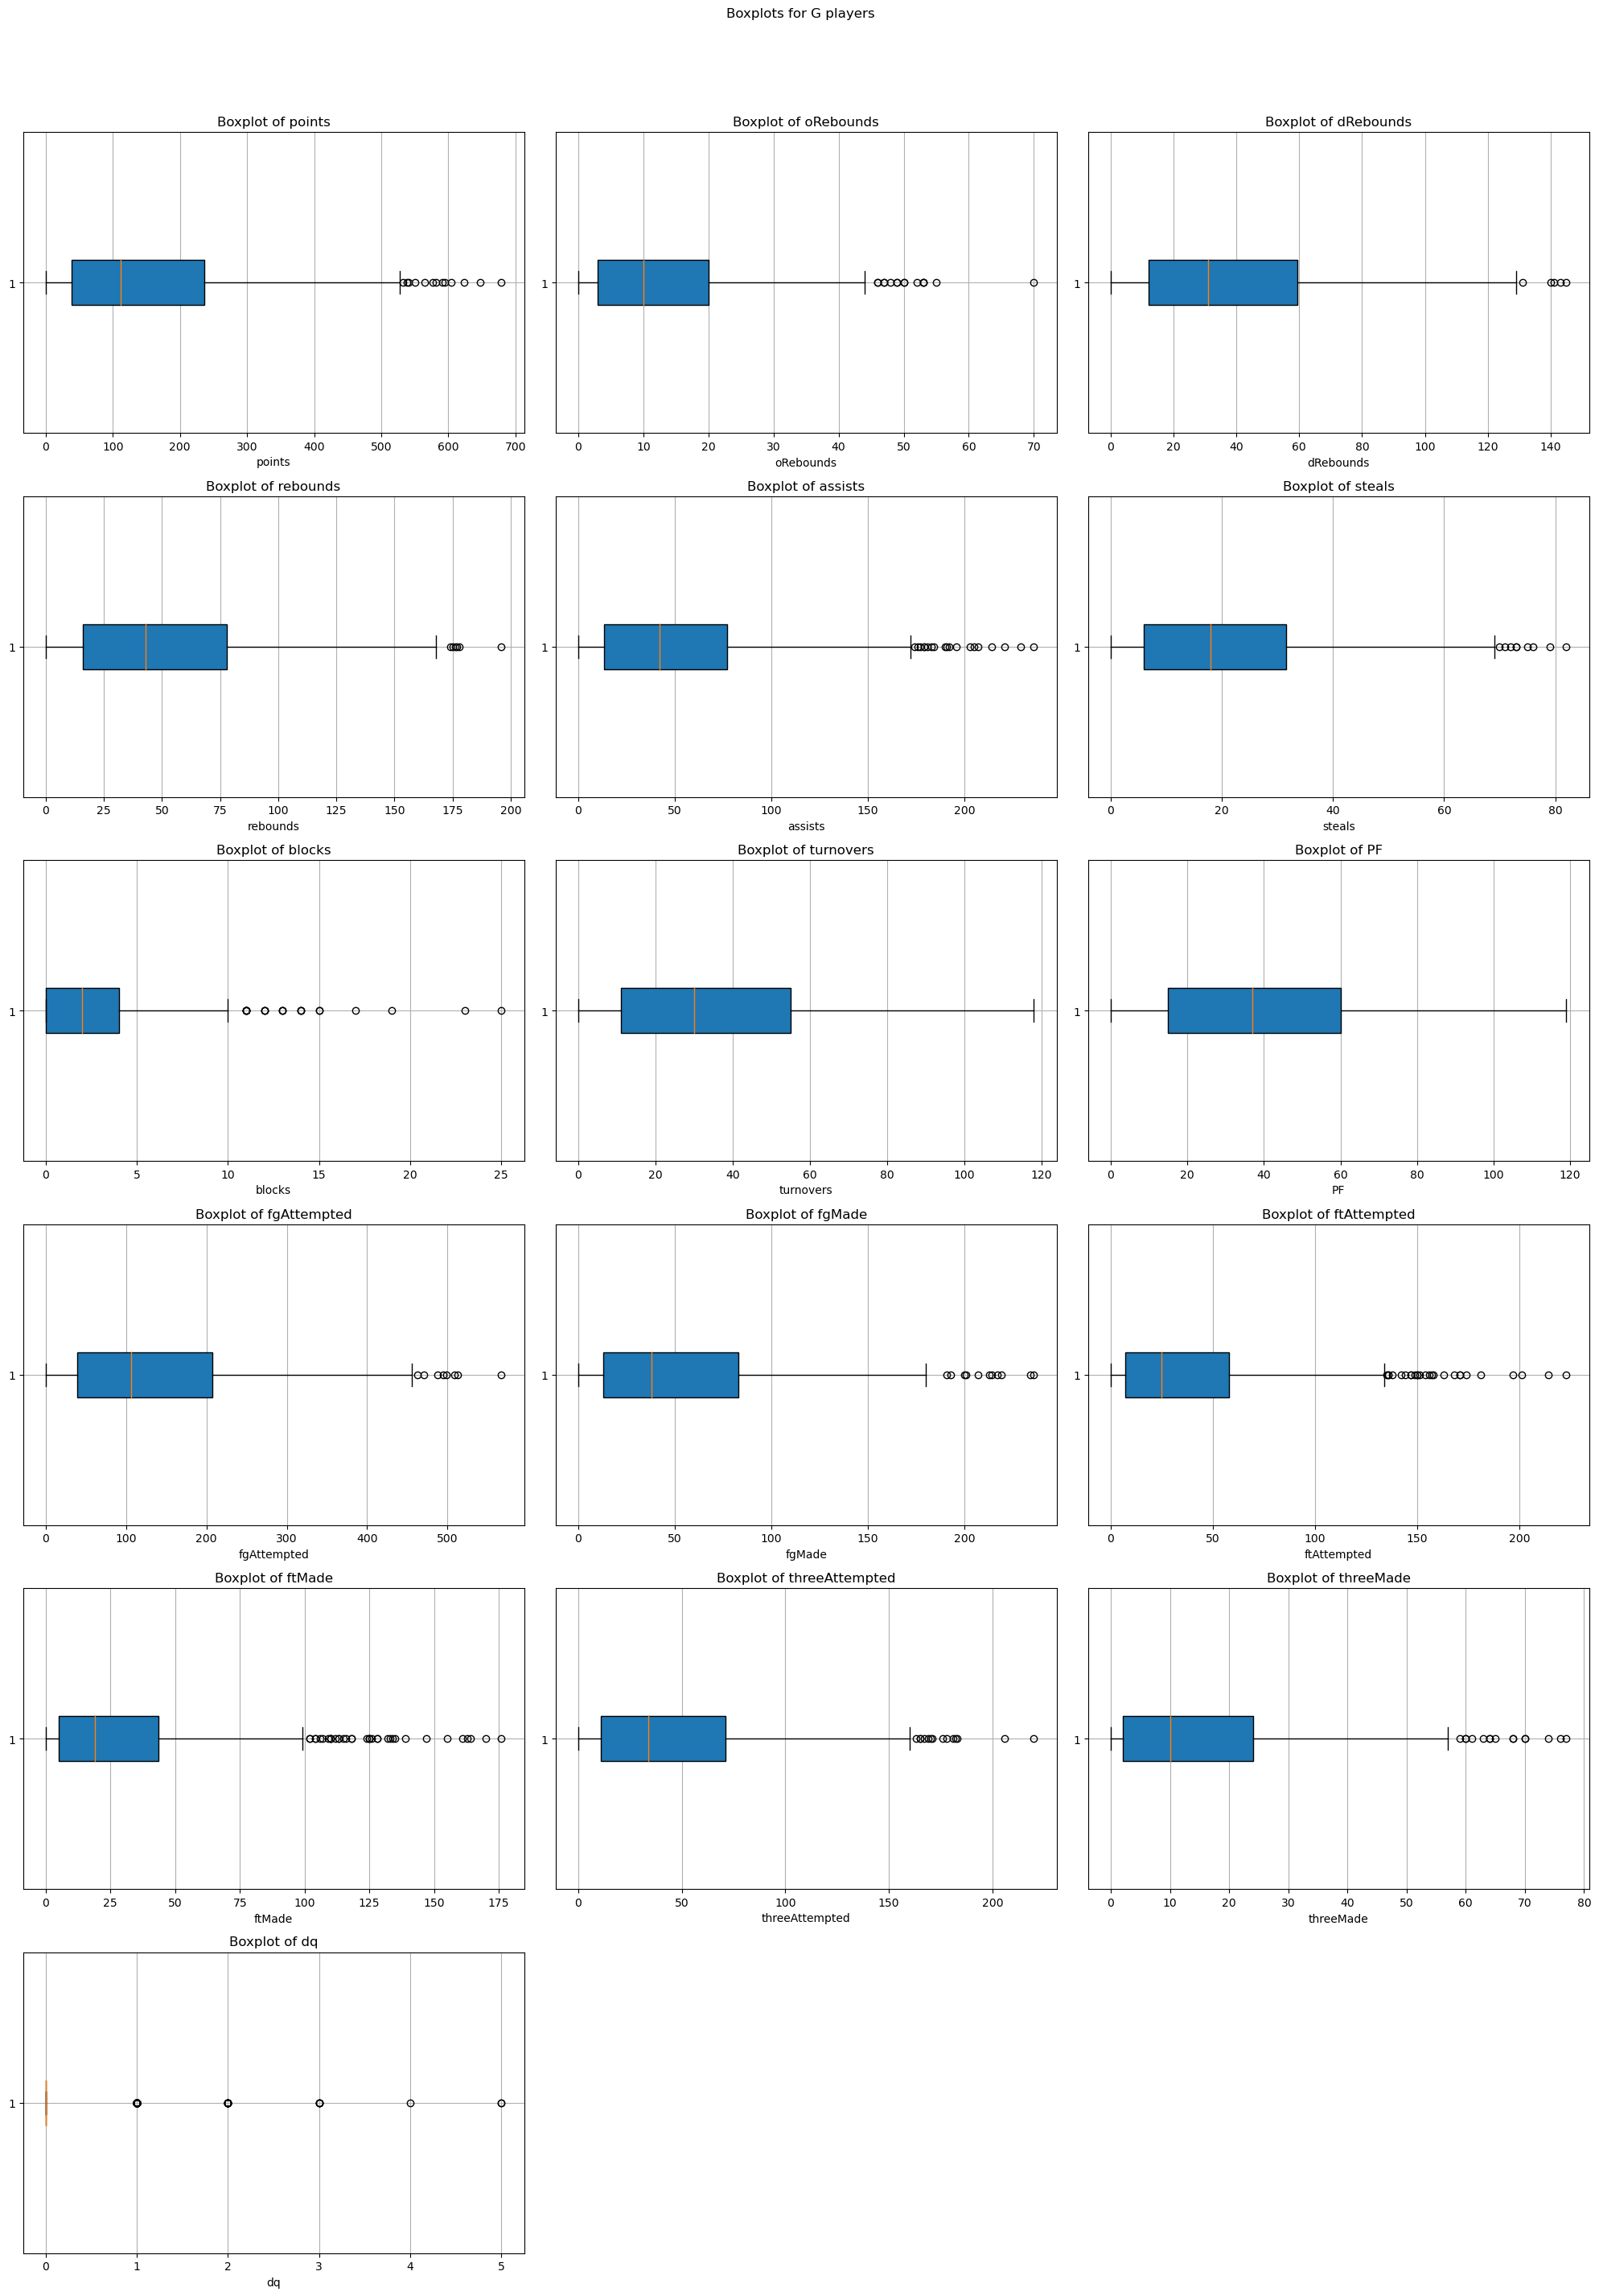

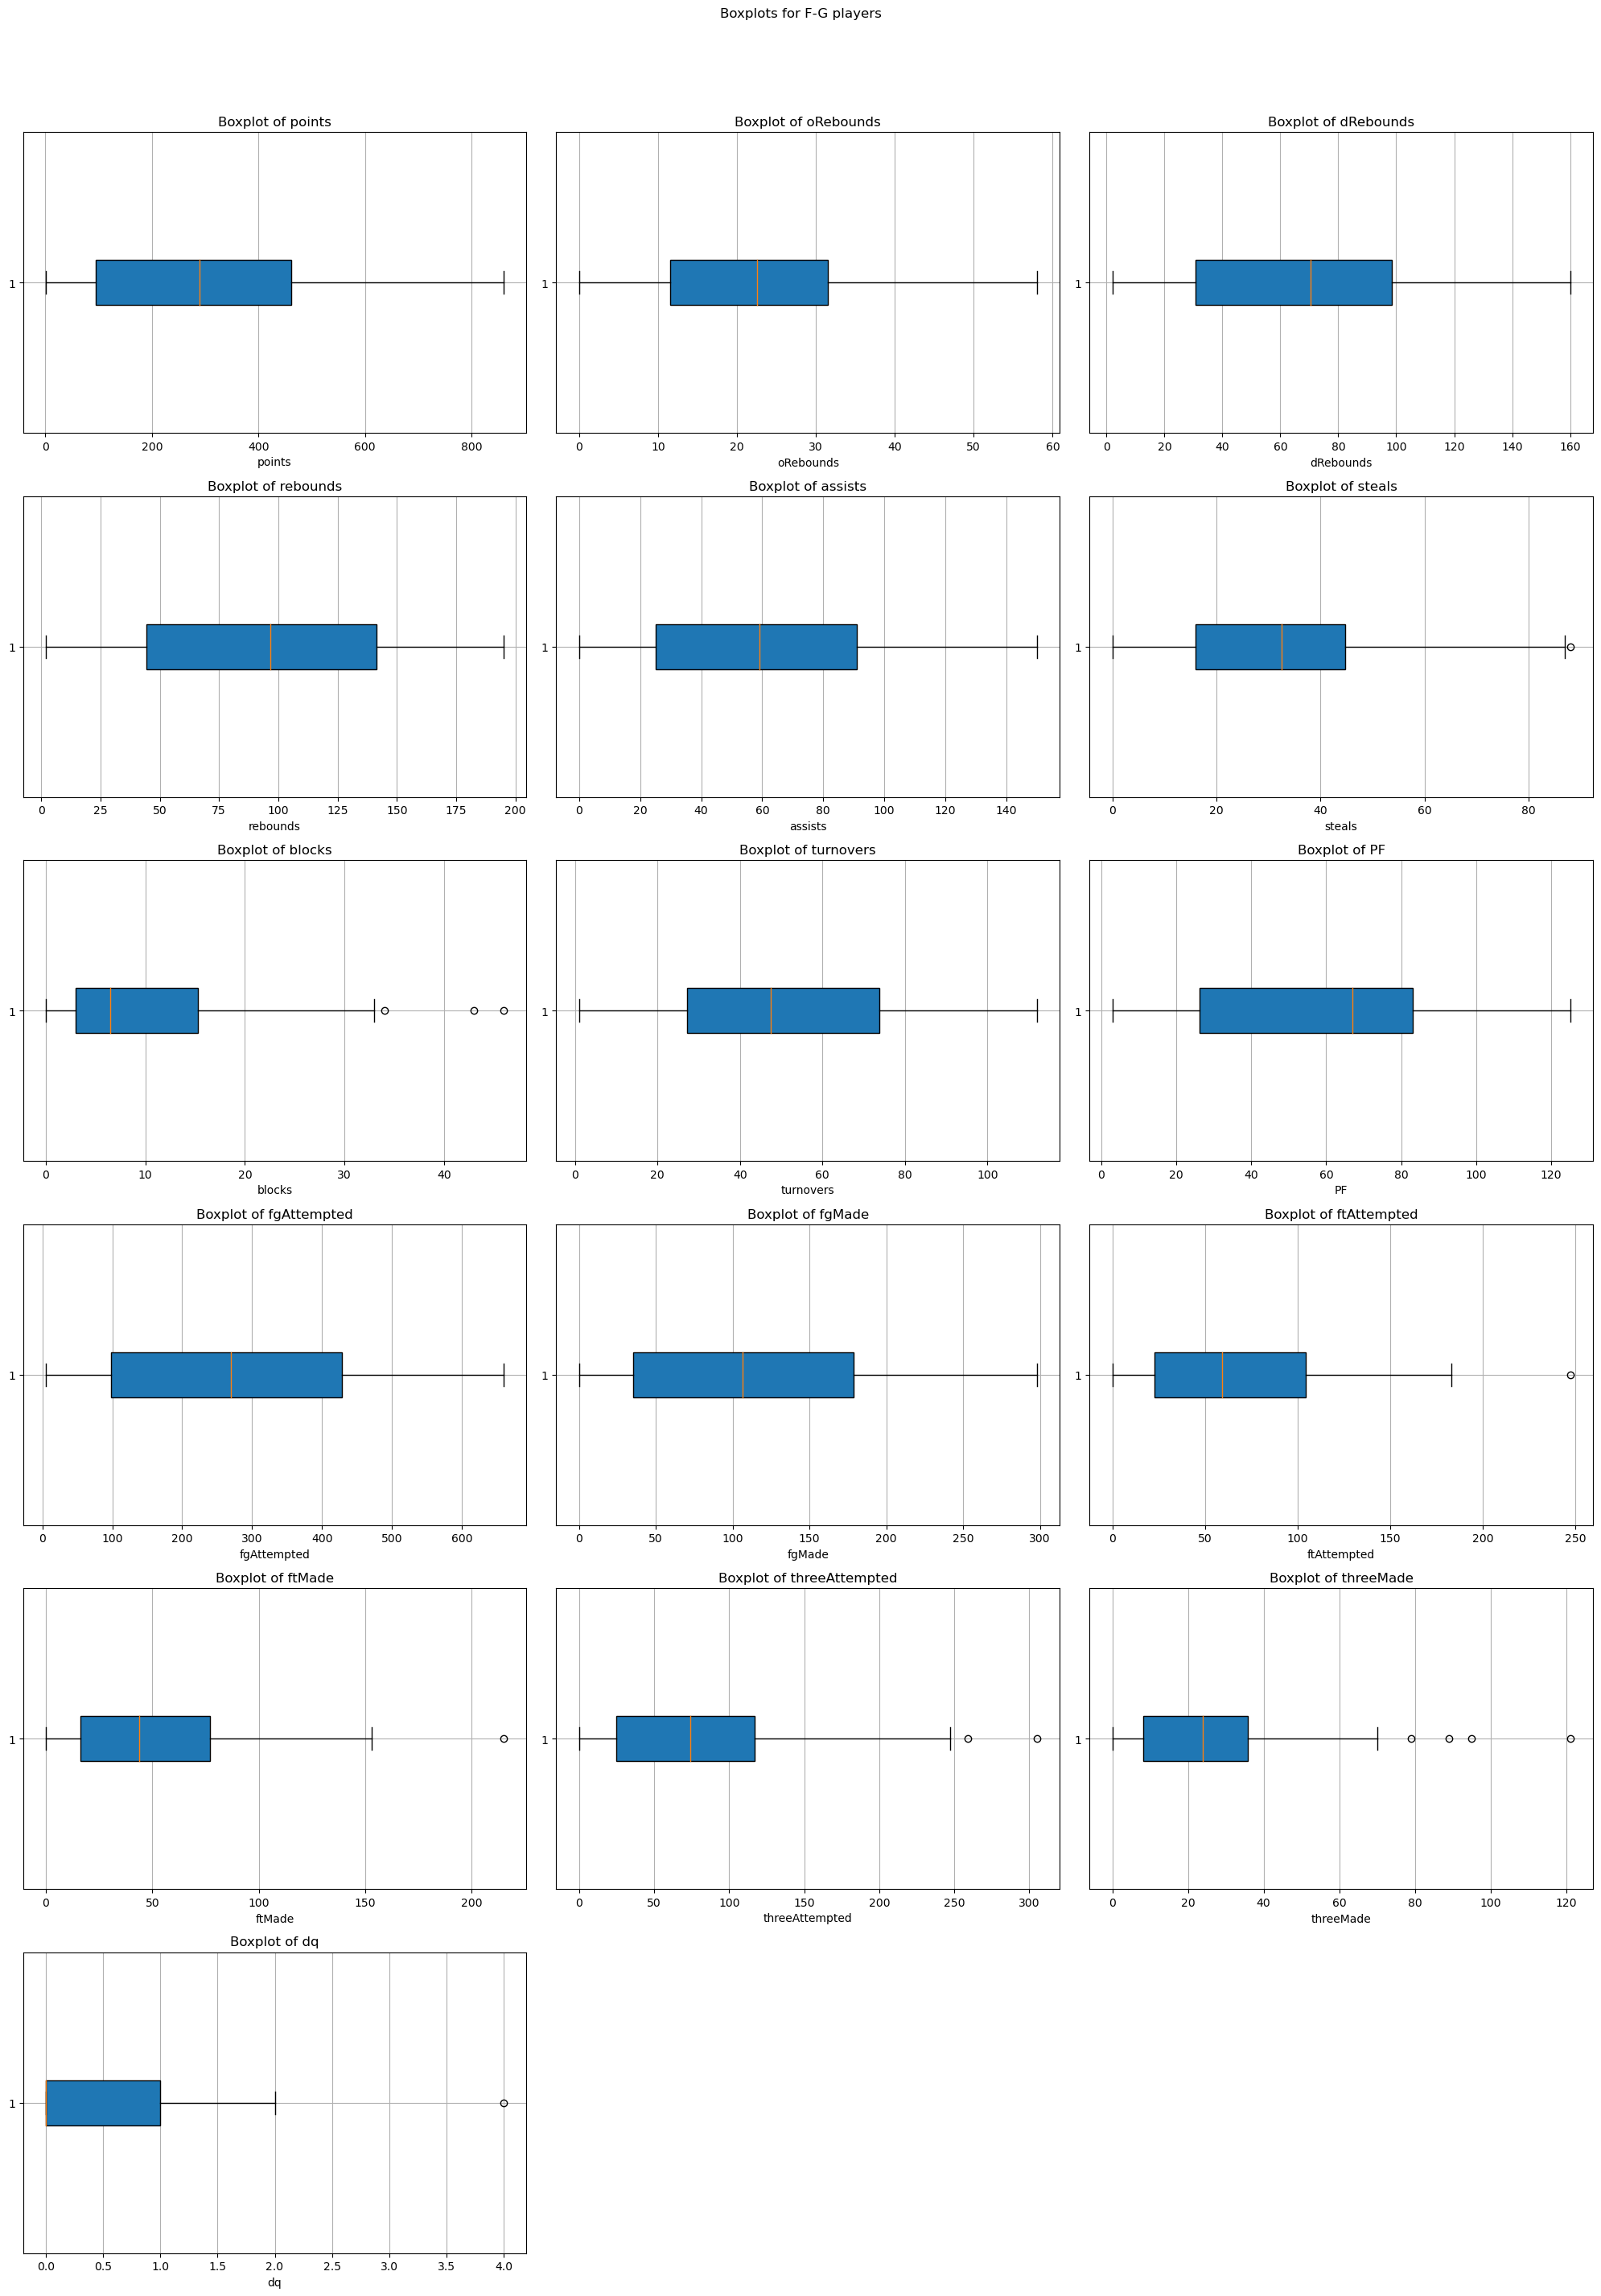

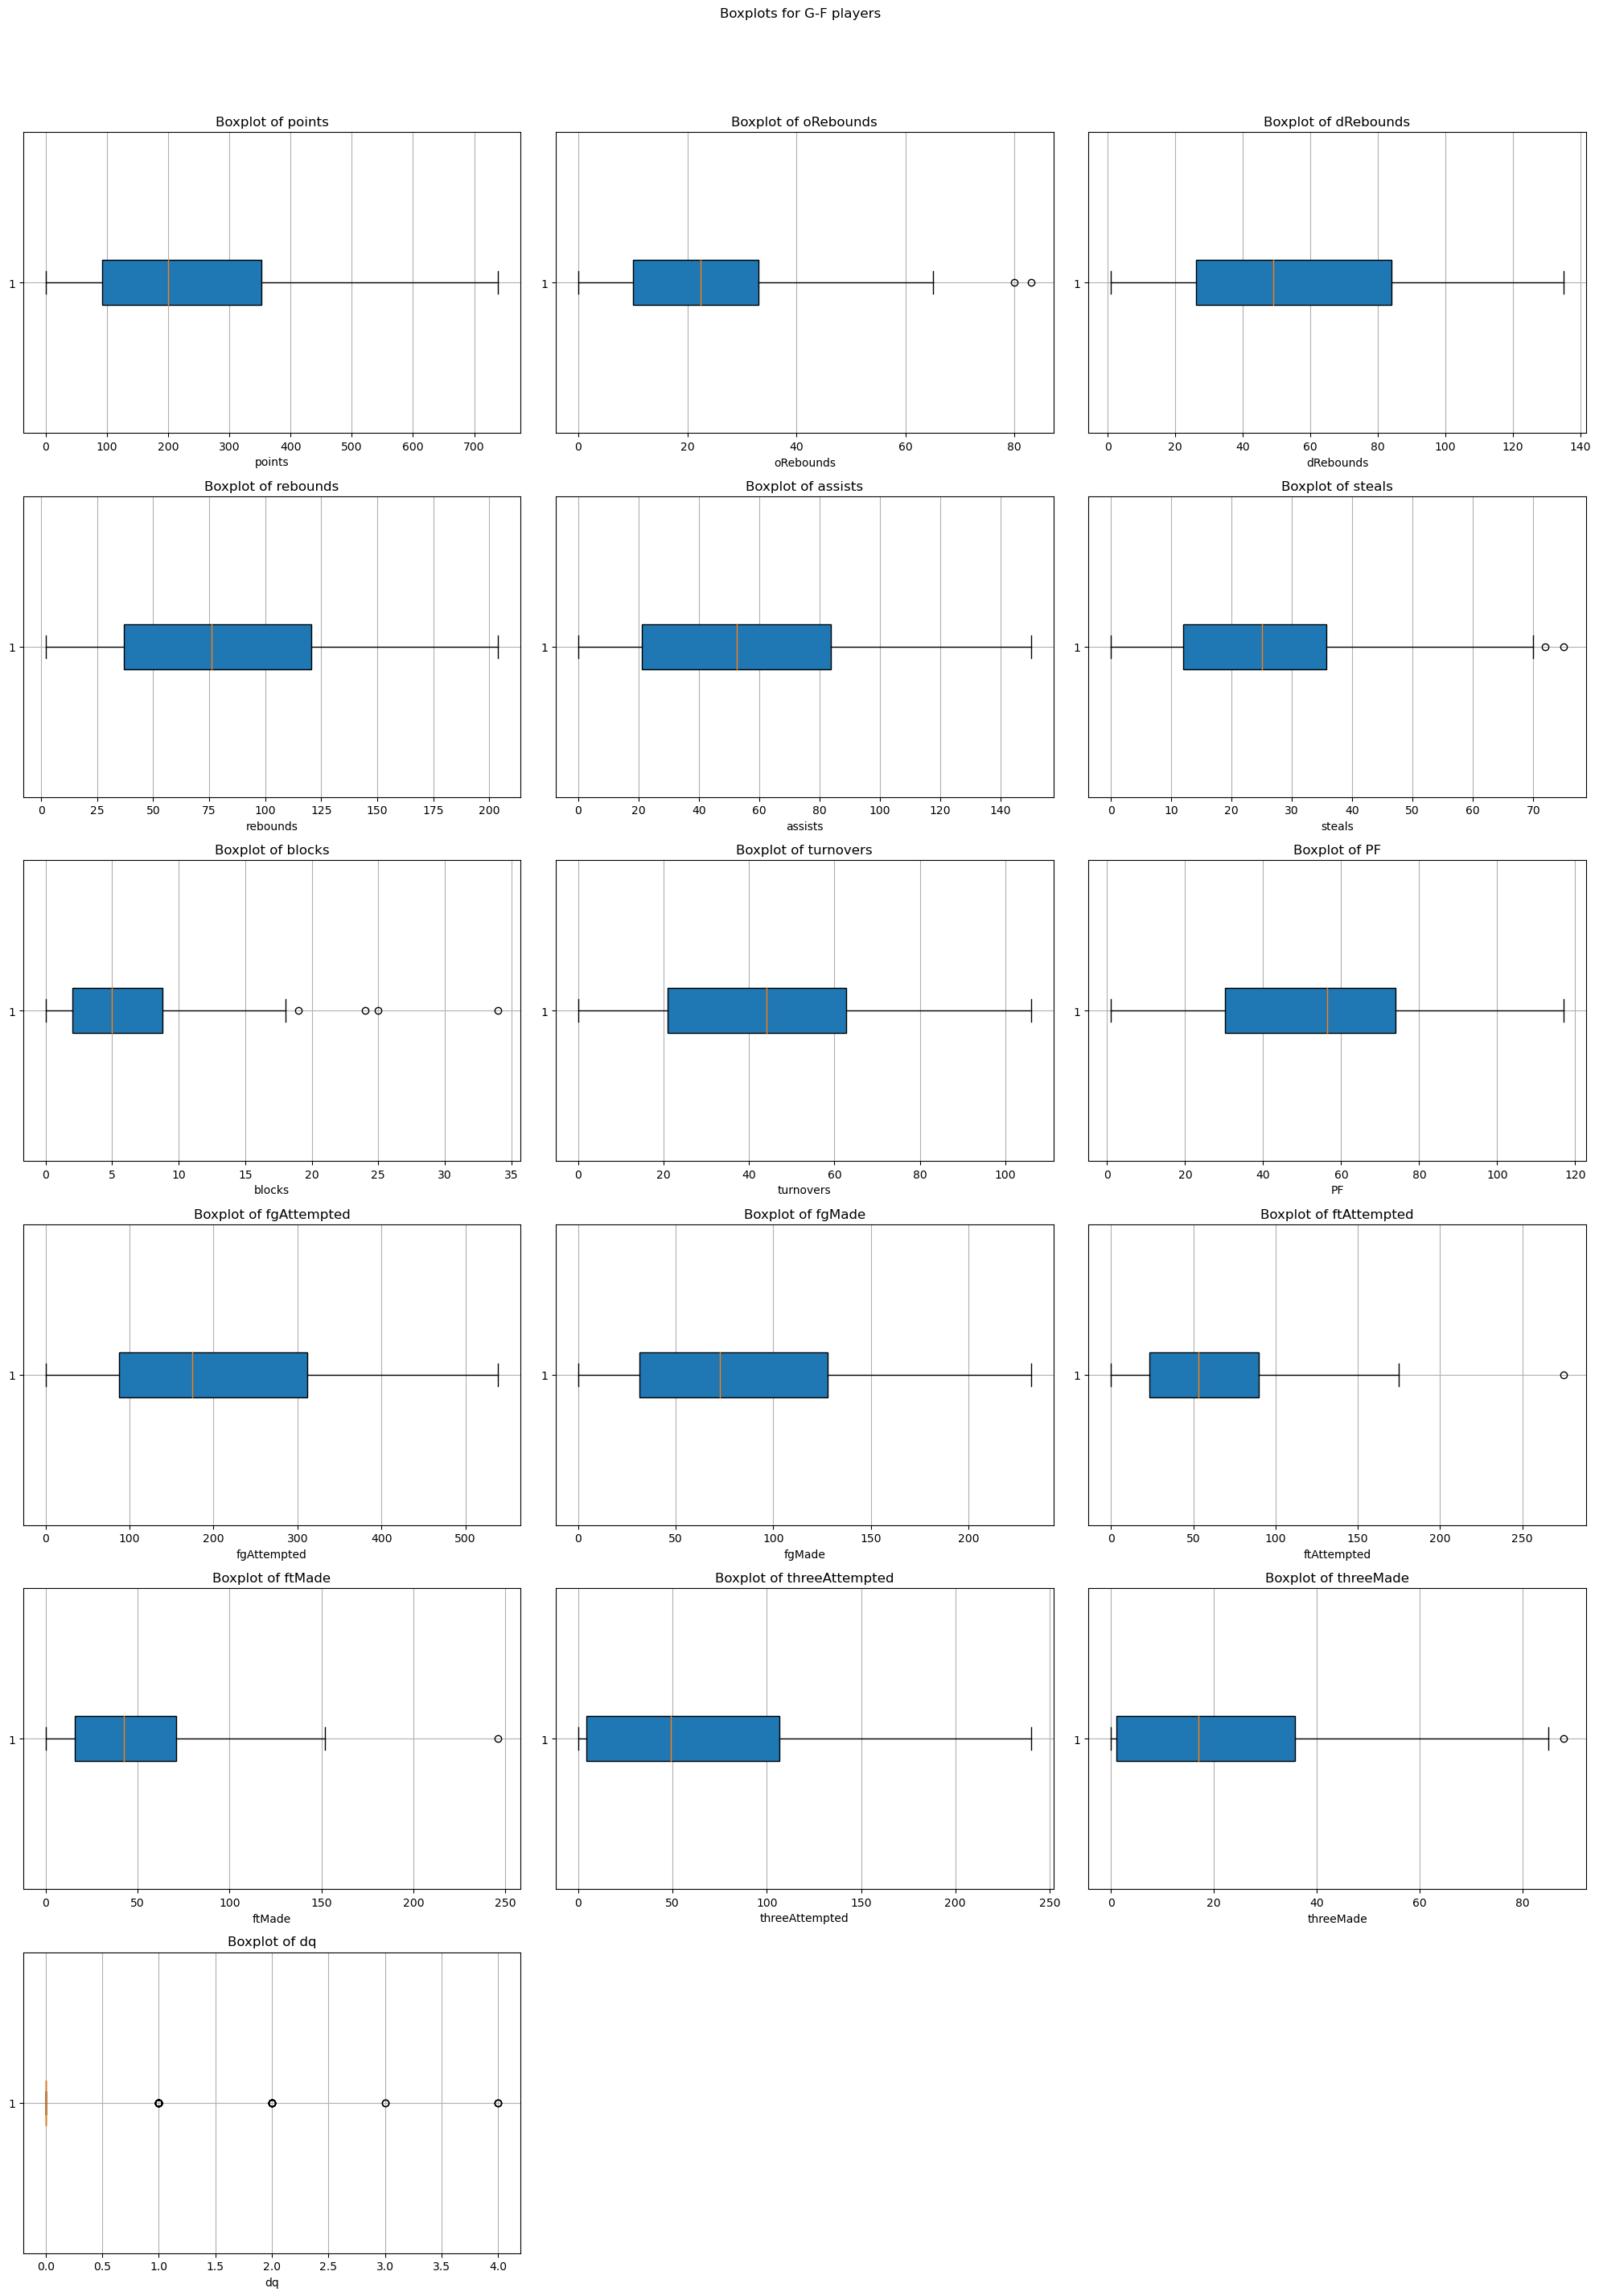

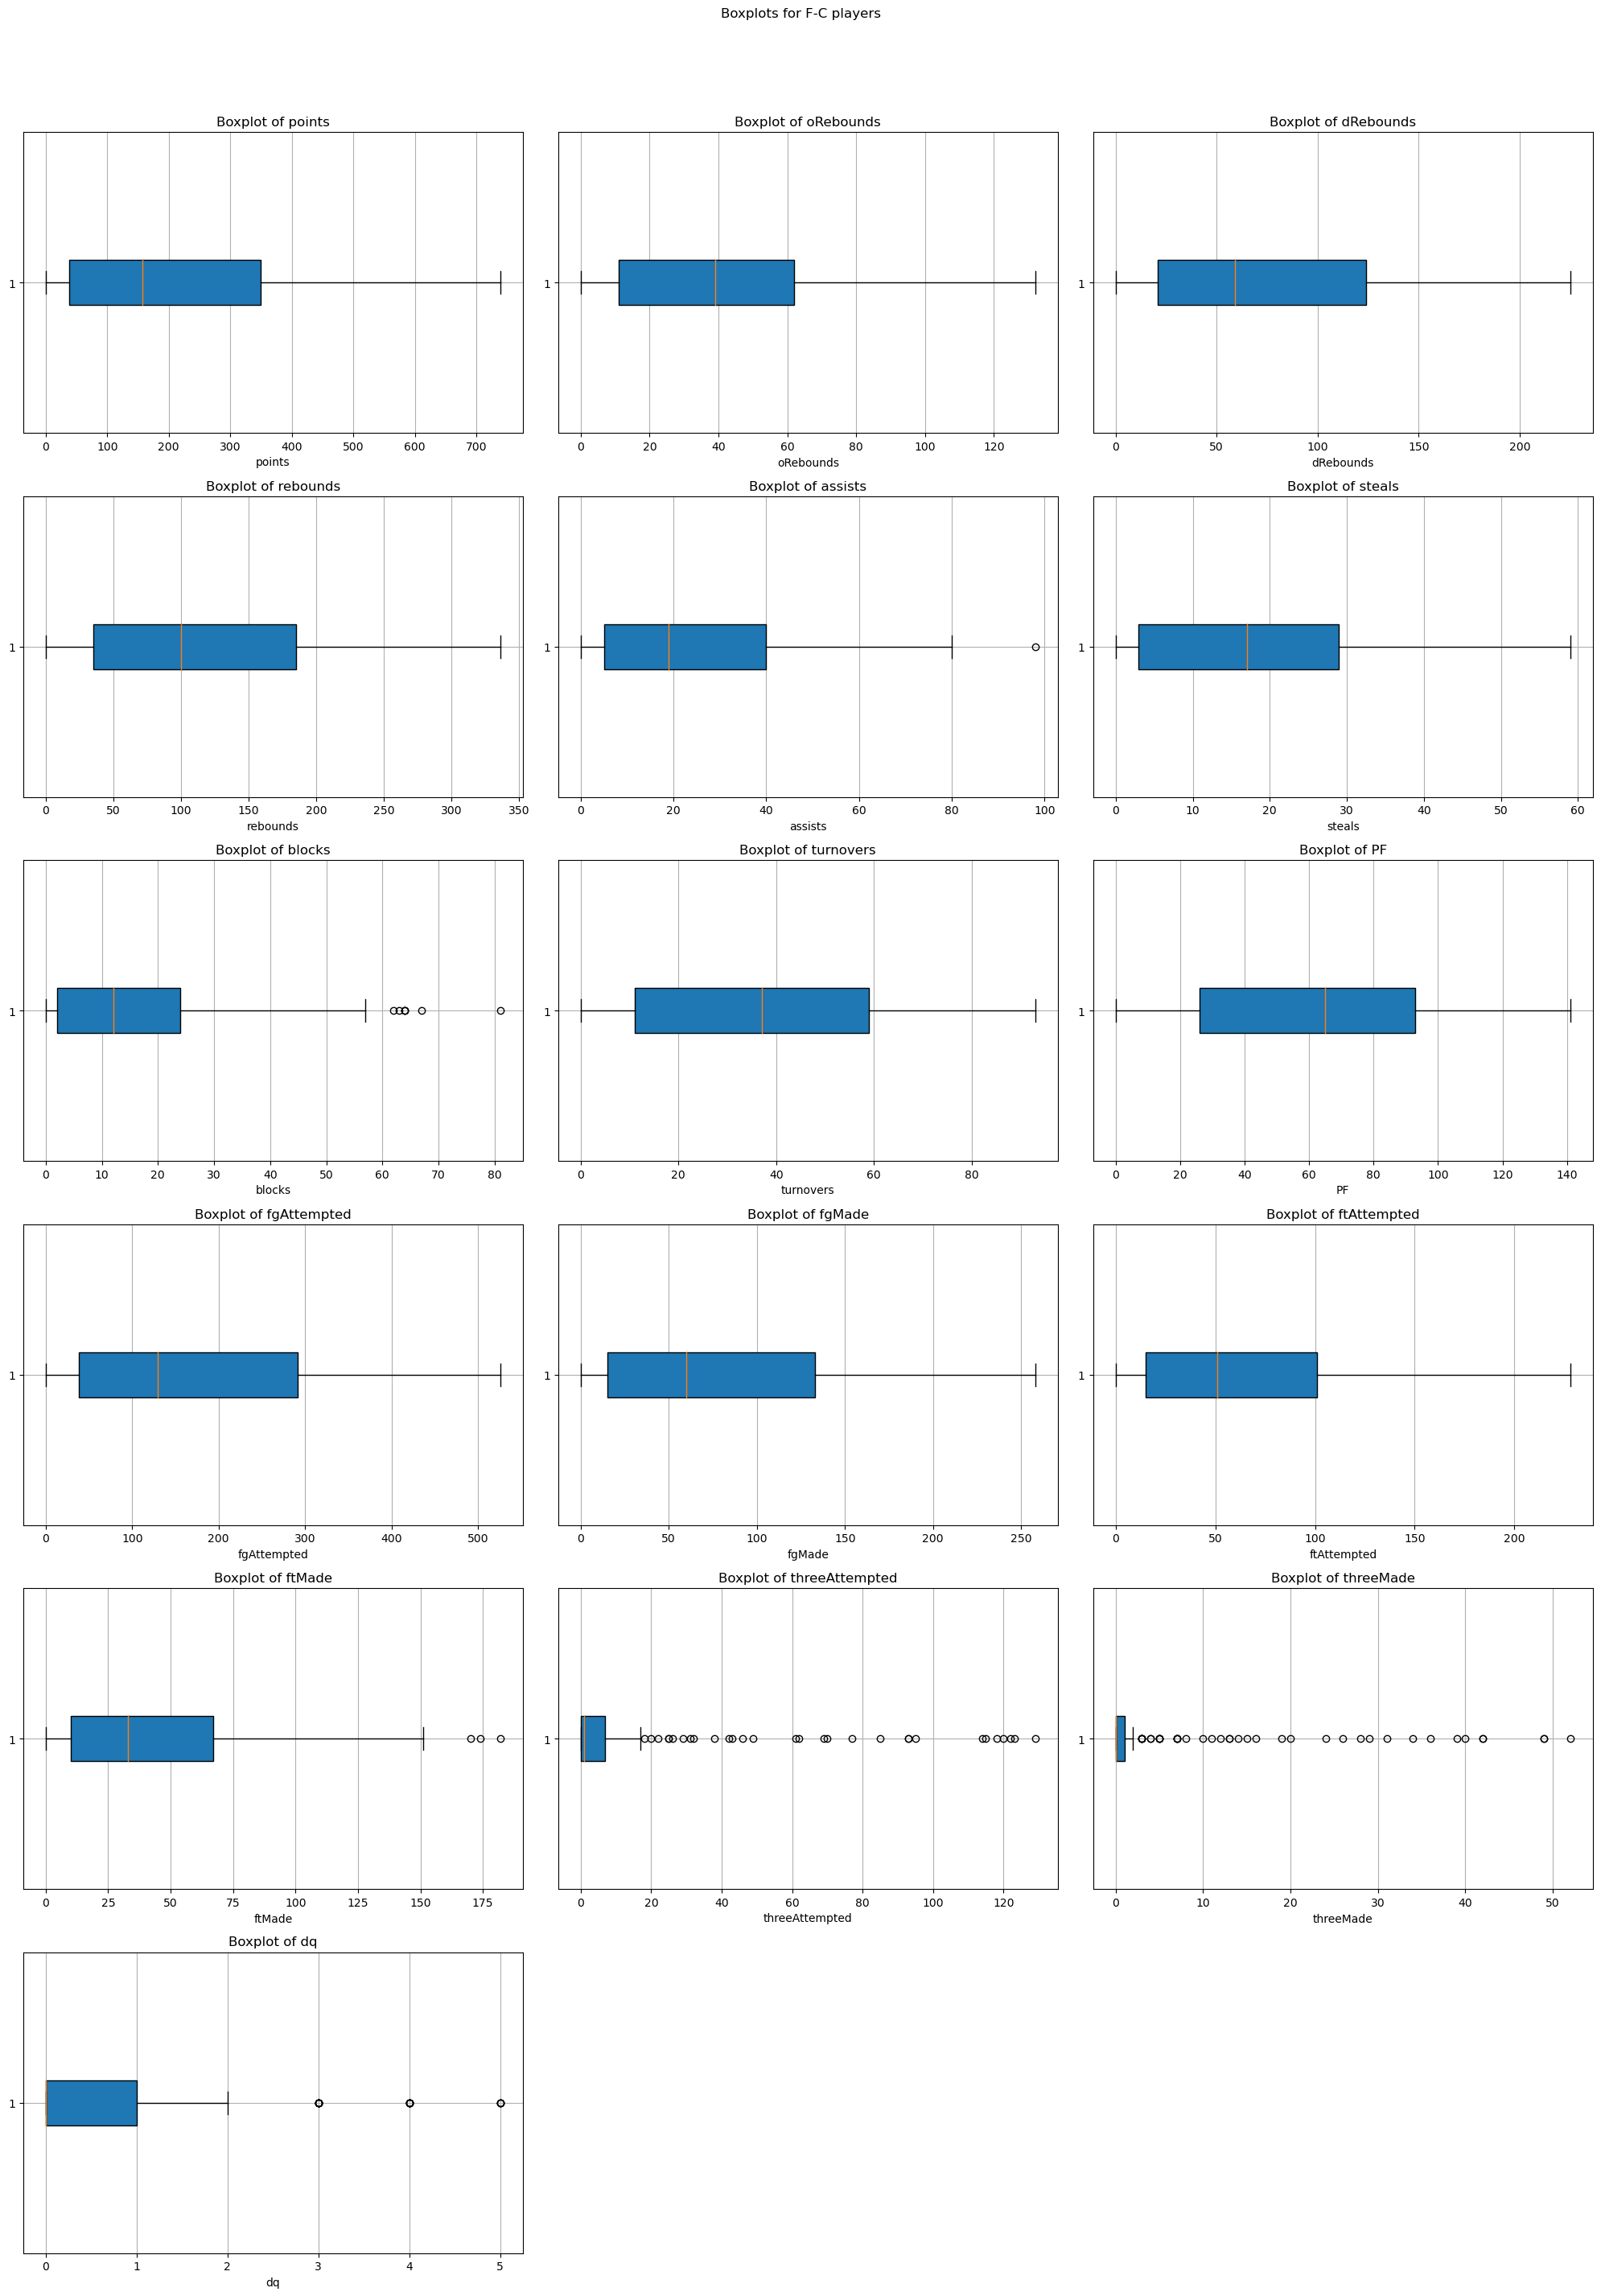

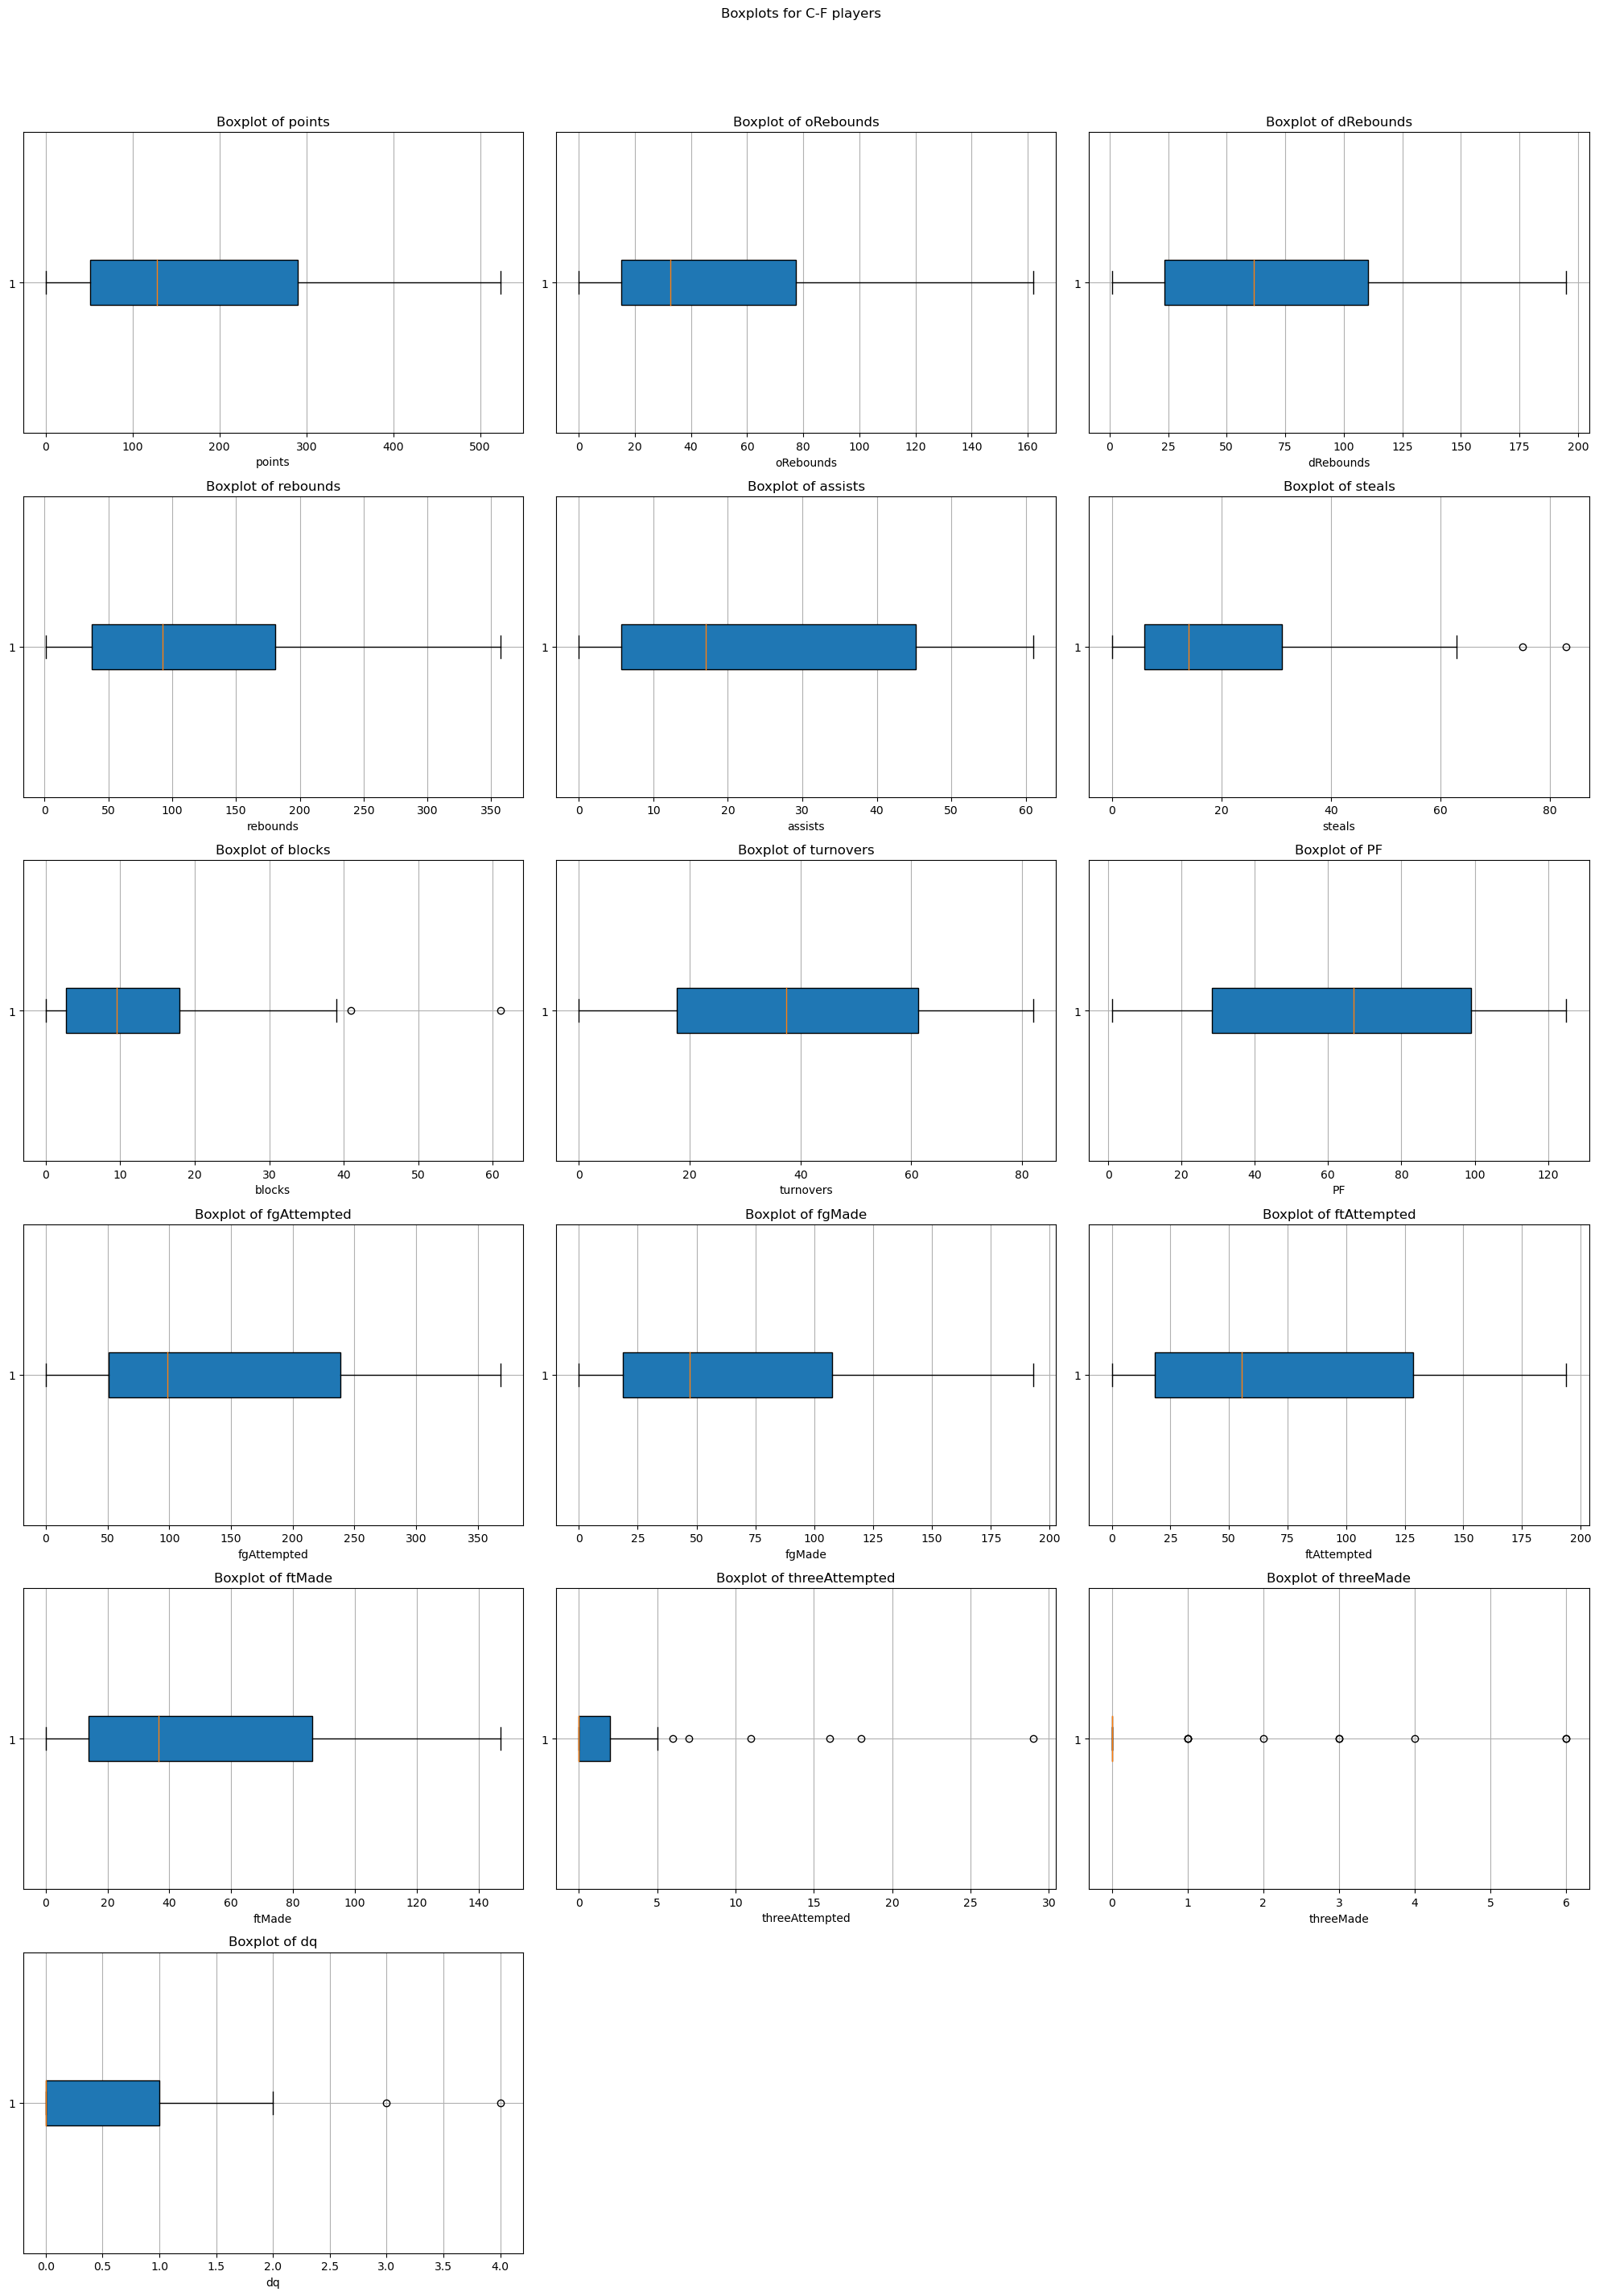

In [13]:
columns = ["points","oRebounds","dRebounds","rebounds","assists","steals","blocks","turnovers","PF","fgAttempted","fgMade","ftAttempted","ftMade","threeAttempted","threeMade","dq"]

merged_data_outliers = pd.merge(csv_playersTeams, csv_players, left_on='playerID', right_on='bioID', suffixes=('_player', '_team'))


for position in merged_data_outliers['pos'].unique():
    position_data = merged_data_outliers[merged_data_outliers['pos'] == position]

    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols  

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

    axes = axes.flatten()

    for i, column in enumerate(columns):
        axes[i].boxplot(position_data[column].dropna(), vert=False, patch_artist=True)
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel(column)
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Boxplots for {position} players')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

#### Outliers in Coaches

In [14]:
won_column = csv_teams['won']
mean = np.mean(won_column)
standard_deviation = np.std(won_column)

print(f"Outliers in Coaches: ")

outliers = []
for won in won_column:
    z_score = (won - mean)/standard_deviation
    if np.abs(z_score) > 3:
        outliers.append(won)

print("Outliers in won: ", outliers)

lost_column = csv_teams['lost']
mean = np.mean(lost_column)
standard_deviation = np.std(lost_column)

outliers = []
for lost in lost_column:
    z_score = (lost - mean)/standard_deviation
    if np.abs(z_score) > 3:
        outliers.append(lost)

print("Outliers in lost: ", outliers)

post_won_column = csv_coaches['post_wins']
mean = np.mean(post_won_column)
standard_deviation = np.std(post_won_column)

outliers = []
for post_won in post_won_column:
    z_score = (post_won - mean)/standard_deviation
    if np.abs(z_score) > 3:
        outliers.append(post_won)

print("Outliers in post_wins: ", outliers)

post_lost_column = csv_coaches['post_losses']
mean = np.mean(post_lost_column)
standard_deviation = np.std(post_lost_column)

outliers = []
for post_lost in post_lost_column:
    z_score = (post_lost - mean)/standard_deviation
    if np.abs(z_score) > 3:
        outliers.append(post_lost)

print("Outliers in post_losses: ", outliers)


Outliers in Coaches: 
Outliers in won:  []
Outliers in lost:  []
Outliers in post_wins:  []
Outliers in post_losses:  []


#### Outliers in Teams

In [15]:
columns_attributes = [
    "o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", 
    "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", 
    "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", 
    "d_fta", "d_3pm", "d_3pa"
]

for column in columns_attributes:
    count_discrepancies = len(csv_teams[csv_teams[column] > csv_teams[column.replace('m', 'a')]])
    if count_discrepancies > 0:
        print(f"The number of rows where '{column}' is greater than the corresponding attempted column is: {count_discrepancies}")
    else: 
        print(f"No discrepancies found for column {column}")
columns_sum = ["GP"]

for column in columns_sum:
    count_mismatches = len(csv_teams[csv_teams[column] != csv_teams['won'] + csv_teams['lost']])
    if count_mismatches > 0:
        print(f"The number of rows where '{column}' is different from the sum of 'won' and 'lost' columns is: {count_mismatches}")
    else: 
        print(f"No discrepancies found for column {column}")


No discrepancies found for column o_fgm
No discrepancies found for column o_fga
No discrepancies found for column o_ftm
No discrepancies found for column o_fta
No discrepancies found for column o_3pm
No discrepancies found for column o_3pa
No discrepancies found for column o_oreb
No discrepancies found for column o_dreb
No discrepancies found for column o_reb
No discrepancies found for column o_asts
No discrepancies found for column o_pf
No discrepancies found for column o_stl
No discrepancies found for column o_to
No discrepancies found for column o_blk
No discrepancies found for column o_pts
No discrepancies found for column d_fgm
No discrepancies found for column d_fga
No discrepancies found for column d_ftm
No discrepancies found for column d_fta
No discrepancies found for column d_3pm
No discrepancies found for column d_3pa
No discrepancies found for column GP
